In [55]:
import pandas as pd
from konlpy.tag import Okt
from gensim.models import word2vec
import nltk # national language tool kit
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np  
t = Okt()

In [56]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [57]:
# train_data불러오기
train = pd.read_csv("../../Data/train_data.csv", index_col='Unnamed: 0')

In [58]:
happy_list = []
for i in range(0, 20):
    happy_list.append(train['가사'][i])

In [59]:
len(happy_list)

20

---
# happy 형태소 분리

In [60]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results1 = []
lines = happy_list
for line in lines:
    # 형태소 분석하기 단어의 기본형 사용 안하기
    train_malist = twitter.pos(line) # 단어의 기본형 사용,norm=True,stem=True
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            # 동사만 추출
            if word[1] in ["Verb"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl_h = (" ".join(r).strip())
    
    results1.append(rl_h)
    #print(rl_v)

In [61]:
token_h = str(results1).split(" ")

In [62]:
# 불용어 추가
stop_words_happy = ["['만나면","안아줘',","'만들어","싶은',","'배웠죠","한',","'였을까","느낄',","'가봤어","잠잠',",\
    "'돌아만","바라봐줘요',","'빗나가는","믿어줘',","'봐요","피어나죠',","'만드는","와',","'지쳐","듣고',","'고를까",\
    "잠든',","'왔잖아","하고',","'애써","몰라주는',","다가갈게',","'따서","'살아왔는지","함께니까',","'불어오는","주세요',",\
        "'들어오면","빠진',","'내게","해',","'하고","봐',","'어린","떠올라']"]
token_happy = [each_word for each_word in token_h if each_word not in stop_words_happy]


In [63]:
# 상위 100개 단어 확인
ko_h = nltk.Text(token_happy)
ko_h.vocab().most_common(500)

[('나를', 29),
 ('해', 14),
 ('내게', 10),
 ('하면', 10),
 ('싶은', 9),
 ('봐', 9),
 ('갈께', 8),
 ('한', 7),
 ('된', 7),
 ('할', 6),
 ('추면서', 6),
 ('참', 6),
 ('와', 6),
 ('돼', 6),
 ('보며', 5),
 ('느낄', 5),
 ('본', 5),
 ('왔던', 5),
 ('봐도', 5),
 ('주세요', 5),
 ('떨리게', 4),
 ('하면서', 4),
 ('웃는', 4),
 ('잖아', 4),
 ('하는', 4),
 ('느껴', 4),
 ('할래', 4),
 ('질러', 4),
 ('해줘', 4),
 ('나도', 4),
 ('모르게', 4),
 ('부는', 4),
 ('하잖아', 4),
 ('싶어', 4),
 ('떠나지', 4),
 ('말아줘', 4),
 ('오면', 3),
 ('보면', 3),
 ('할게', 3),
 ('들으며', 3),
 ('기다리면서', 3),
 ('부르며', 3),
 ('이루는', 3),
 ('오질', 3),
 ('않네요', 3),
 ('멀어져', 3),
 ('만드는', 3),
 ('아껴줄게', 3),
 ('알까', 3),
 ('애써', 3),
 ('지펴', 3),
 ('던져', 3),
 ('모르는', 3),
 ('잠잠', 3),
 ('갈', 3),
 ('져서', 3),
 ('녹아내리면', 3),
 ('꿈꿔', 3),
 ('하며', 3),
 ('믿지', 3),
 ('하겠지만', 3),
 ('들리지만', 3),
 ('주고', 3),
 ('믿어줘', 3),
 ('떨리는', 3),
 ('보이는', 3),
 ('해봐요', 3),
 ('가고', 3),
 ('따라', 3),
 ('잊으려고', 3),
 ('해봐도', 3),
 ('잘', 3),
 ('된다고', 3),
 ('뜨면', 3),
 ('싶어요', 3),
 ('머물러줘요', 3),
 ('손잡아', 3),
 ('안아', 3),
 ('커져만', 3),
 ('가', 3),
 ('밤새워'

In [64]:
len(ko_h.vocab())

364

In [65]:
# 불용어 작업후 빈도수가 2이하인 경우 전부 삭제 
testing_h = []
for key, val in zip(list(ko_h.vocab().keys()),list(ko_h.vocab().values())):
    if val < 3:
        testing_h.append([key,val])
testing_h2 = []
for i in range(len(testing_h)):
    testing_h2.append(str(testing_h[i][0]))

In [66]:
# 1번 사용된 언어 지운후 다시 확인
token_del = set(ko_h.vocab()) - set(testing_h2)
token_ko1 = [each_word for each_word in token_h if each_word in token_del]
ko_h = nltk.Text(token_ko1)
ko_h.vocab().most_common(500)

[('나를', 29),
 ('해', 14),
 ('내게', 10),
 ('하면', 10),
 ('싶은', 9),
 ('봐', 9),
 ('갈께', 8),
 ('한', 7),
 ('된', 7),
 ('할', 6),
 ('추면서', 6),
 ('참', 6),
 ('와', 6),
 ('돼', 6),
 ('보며', 5),
 ('느낄', 5),
 ('본', 5),
 ('왔던', 5),
 ('봐도', 5),
 ('주세요', 5),
 ('떨리게', 4),
 ('하면서', 4),
 ('웃는', 4),
 ('잖아', 4),
 ('하는', 4),
 ('느껴', 4),
 ('할래', 4),
 ('질러', 4),
 ('해줘', 4),
 ('나도', 4),
 ('모르게', 4),
 ('부는', 4),
 ('하잖아', 4),
 ('싶어', 4),
 ('떠나지', 4),
 ('말아줘', 4),
 ('오면', 3),
 ('보면', 3),
 ('할게', 3),
 ('들으며', 3),
 ('기다리면서', 3),
 ('부르며', 3),
 ('이루는', 3),
 ('오질', 3),
 ('않네요', 3),
 ('멀어져', 3),
 ('만드는', 3),
 ('아껴줄게', 3),
 ('알까', 3),
 ('애써', 3),
 ('지펴', 3),
 ('던져', 3),
 ('모르는', 3),
 ('잠잠', 3),
 ('갈', 3),
 ('져서', 3),
 ('녹아내리면', 3),
 ('꿈꿔', 3),
 ('하며', 3),
 ('믿지', 3),
 ('하겠지만', 3),
 ('들리지만', 3),
 ('주고', 3),
 ('믿어줘', 3),
 ('떨리는', 3),
 ('보이는', 3),
 ('해봐요', 3),
 ('가고', 3),
 ('따라', 3),
 ('잊으려고', 3),
 ('해봐도', 3),
 ('잘', 3),
 ('된다고', 3),
 ('뜨면', 3),
 ('싶어요', 3),
 ('머물러줘요', 3),
 ('손잡아', 3),
 ('안아', 3),
 ('커져만', 3),
 ('가', 3),
 ('밤새워'

In [67]:
len(ko_h.vocab())

82

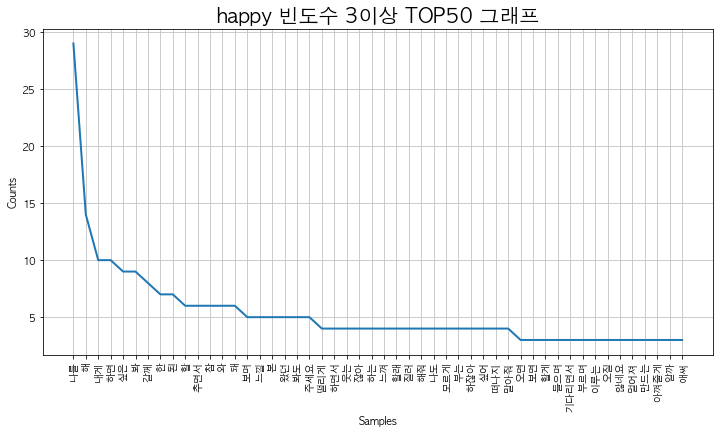

In [68]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("happy 빈도수 3이상 TOP50 그래프", size =20)
ko_h.plot(50)
plt.show()

In [69]:
# #워드클라우드의 모양 설정. 동사이미지 가져오기
# import numpy as np
# from PIL import *
# cand_mask=np.array(Image.open('../../Data/image/동사2.png'))

In [70]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko_h.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data3)

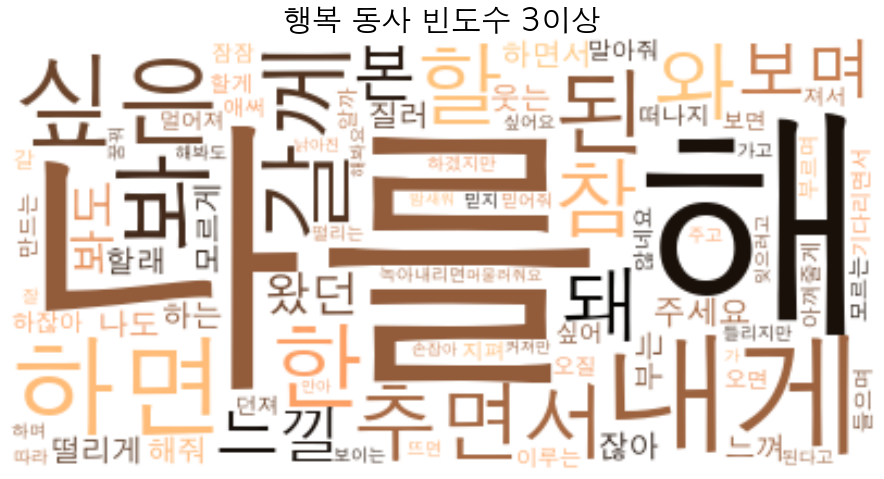

In [71]:
plt.figure(figsize=(16,8))
plt.title("행복 동사 빈도수 3이상", size =30, weight = 'bold')
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()


### 추출한 happy 토큰 확인하기

In [72]:
# 동사 토큰
print("동사토큰 : \n",list(ko_h.vocab())," => 동사 토큰 갯수 : ",len(list(ko_h.vocab())))

동사토큰 : 
 ['나를', '해', '내게', '하면', '싶은', '봐', '갈께', '한', '된', '할', '추면서', '참', '와', '돼', '보며', '느낄', '본', '왔던', '봐도', '주세요', '떨리게', '하면서', '웃는', '잖아', '하는', '느껴', '할래', '질러', '해줘', '나도', '모르게', '부는', '하잖아', '싶어', '떠나지', '말아줘', '오면', '보면', '할게', '들으며', '기다리면서', '부르며', '이루는', '오질', '않네요', '멀어져', '만드는', '아껴줄게', '알까', '애써', '지펴', '던져', '모르는', '잠잠', '갈', '져서', '녹아내리면', '꿈꿔', '하며', '믿지', '하겠지만', '들리지만', '주고', '믿어줘', '떨리는', '보이는', '해봐요', '가고', '따라', '잊으려고', '해봐도', '잘', '된다고', '뜨면', '싶어요', '머물러줘요', '손잡아', '안아', '커져만', '가', '밤새워', '낡아진']  => 동사 토큰 갯수 :  82


In [73]:
token_happy = list(ko_h.vocab())

---
# sad

In [74]:
sad_list = []
for i in range(20, 40):
    sad_list.append(train['가사'][i])

In [75]:
len(sad_list)

20

In [76]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results2 = []
lines = sad_list
for line in lines:
    # 형태소 분석하기 단어의 기본형 사용 안하기
    train_malist = twitter.pos(line) # 단어의 기본형 사용,norm=True,stem=True
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            # 동사만 추출
            if word[1] in ["Verb"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl_s = (" ".join(r).strip())
    
    results2.append(rl_s)

In [77]:
token_s = str(results2).split(" ")

In [78]:
# 불용어 추가
stop_words_sad = ["'할","['떨어질","참',","'떠보니","['떨어질","떠보니',","'들었지","무너졌어',","'헤어지기로",\
    "해줘',","'돌아보지","잊혀질까',","'해야지","해',","'이었는지","는',","'끝나","봐',","'잊자","나도',","'지나면",\
    "비우지',","'알아볼","싶다',","'미루고","까','지울게","보낼',","'내리는","지우고',","'하고","기다린다',","할',",\
    "'보면","흐르는데',","할말',","'늦춘다면","사라지고',","'했는데","미워요']"]
token_sad = [each_word for each_word in token_s if each_word not in stop_words_sad]


In [79]:
# 상위 100개 단어 확인
ko_s = nltk.Text(token_sad)
ko_s.vocab().most_common(500)

[('봐', 22),
 ('할', 13),
 ('나를', 10),
 ('잘', 10),
 ('해', 9),
 ('했던', 9),
 ('버린', 8),
 ('애써', 7),
 ('나도', 7),
 ('한', 6),
 ('하면', 6),
 ('줘', 6),
 ('참', 6),
 ('걸까', 6),
 ('해줘', 6),
 ('마시고', 6),
 ('나면', 6),
 ('잖아', 6),
 ('했어', 5),
 ('돼', 5),
 ('들은', 5),
 ('견디기', 5),
 ('않을', 5),
 ('줬던', 5),
 ('바랄게', 5),
 ('내게', 5),
 ('바라만', 5),
 ('본다', 5),
 ('따라', 5),
 ('나와', 5),
 ('잊고', 4),
 ('지워', 4),
 ('할게', 4),
 ('서', 4),
 ('보낼', 4),
 ('잊을', 4),
 ('하지', 4),
 ('다가갈', 4),
 ('가져가', 4),
 ('지워줘', 4),
 ('싶어', 4),
 ('안기던', 4),
 ('맞추던', 4),
 ('걷던', 3),
 ('지나면', 3),
 ('되는', 3),
 ('웃는', 3),
 ('되어', 3),
 ('봐도', 3),
 ('가버리면', 3),
 ('들려오는', 3),
 ('하려해', 3),
 ('보낼게', 3),
 ('돌아보지', 3),
 ('하는', 3),
 ('했단', 3),
 ('않아', 3),
 ('듣던', 3),
 ('남겨', 3),
 ('됐고', 3),
 ('잊어', 3),
 ('모르는', 3),
 ('싶다', 3),
 ('헤어져야', 3),
 ('만난다면', 3),
 ('하길', 3),
 ('보면', 3),
 ('미운', 3),
 ('싶죠', 3),
 ('오겠지', 2),
 ('떠올리는', 2),
 ('생각나', 2),
 ('이었다', 2),
 ('떠나가면', 2),
 ('감으면', 2),
 ('될', 2),
 ('참을', 2),
 ('딴', 2),
 ('해도', 2),
 ('지내', 2),
 ('하기를', 2),
 ('

In [80]:
len(ko_s.vocab())

408

In [81]:
# 불용어 작업후 빈도수가 2이하인 경우 전부 삭제 
testing_s = []
for key, val in zip(list(ko_s.vocab().keys()),list(ko_s.vocab().values())):
    if val < 3:
        testing_s.append([key,val])
testing_s2 = []
for i in range(len(testing_s)):
    testing_s2.append(str(testing_s[i][0]))

In [82]:
# 2번이하 사용된 언어 지운후 다시 확인
token_del = set(ko_s.vocab()) - set(testing_s2)
token_ko2 = [each_word for each_word in token_s if each_word in token_del]
ko_s = nltk.Text(token_ko2)
ko_s.vocab().most_common(500)

[('봐', 22),
 ('할', 13),
 ('나를', 10),
 ('잘', 10),
 ('해', 9),
 ('했던', 9),
 ('버린', 8),
 ('애써', 7),
 ('나도', 7),
 ('한', 6),
 ('하면', 6),
 ('줘', 6),
 ('참', 6),
 ('걸까', 6),
 ('해줘', 6),
 ('마시고', 6),
 ('나면', 6),
 ('잖아', 6),
 ('했어', 5),
 ('돼', 5),
 ('들은', 5),
 ('견디기', 5),
 ('않을', 5),
 ('줬던', 5),
 ('바랄게', 5),
 ('내게', 5),
 ('바라만', 5),
 ('본다', 5),
 ('따라', 5),
 ('나와', 5),
 ('잊고', 4),
 ('지워', 4),
 ('할게', 4),
 ('서', 4),
 ('보낼', 4),
 ('잊을', 4),
 ('하지', 4),
 ('다가갈', 4),
 ('가져가', 4),
 ('지워줘', 4),
 ('싶어', 4),
 ('안기던', 4),
 ('맞추던', 4),
 ('걷던', 3),
 ('지나면', 3),
 ('되는', 3),
 ('웃는', 3),
 ('되어', 3),
 ('봐도', 3),
 ('가버리면', 3),
 ('들려오는', 3),
 ('하려해', 3),
 ('보낼게', 3),
 ('돌아보지', 3),
 ('하는', 3),
 ('했단', 3),
 ('않아', 3),
 ('듣던', 3),
 ('남겨', 3),
 ('됐고', 3),
 ('잊어', 3),
 ('모르는', 3),
 ('싶다', 3),
 ('헤어져야', 3),
 ('만난다면', 3),
 ('하길', 3),
 ('보면', 3),
 ('미운', 3),
 ('싶죠', 3)]

In [83]:
len(ko_s.vocab())

69

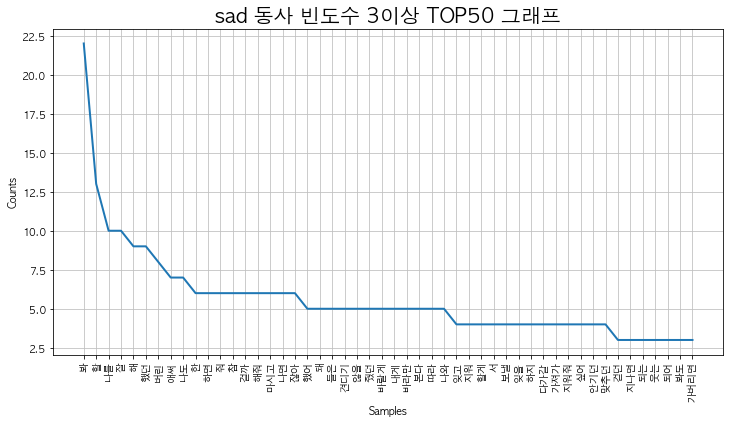

In [84]:
# sad 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("sad 동사 빈도수 3이상 TOP50 그래프", size =20)
ko_s.plot(50)
plt.show()

In [85]:
# #워드클라우드의 모양 설정. 동사이미지 가져오기
# import numpy as np
# from PIL import *
# cand_mask=np.array(Image.open('../../Data/image/동사2.png'))

In [86]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko_s.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data3)

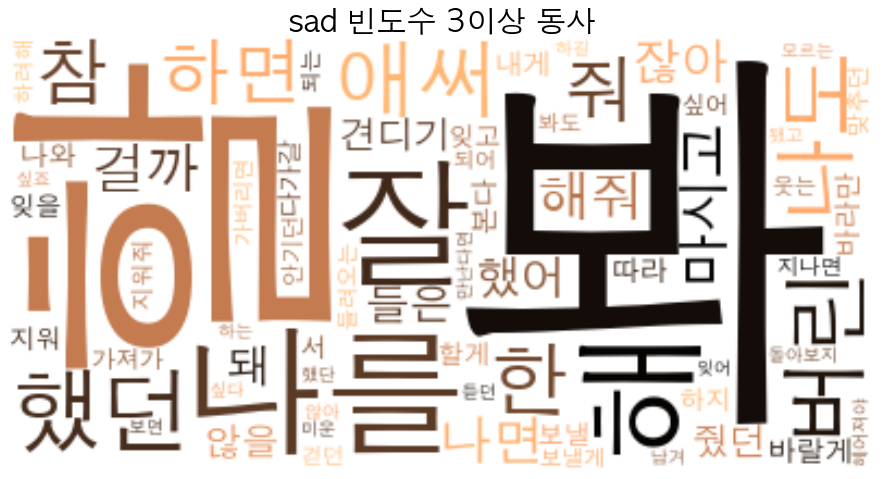

In [87]:
plt.figure(figsize=(16,8))
plt.title("sad 빈도수 3이상 동사", size =30, weight = 'bold')
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

### 추출한 sad 토큰 확인하기

In [88]:
# sad 동사 토큰
print("동사토큰 : \n",list(ko_s.vocab())," => 동사 토큰 갯수 : ",len(list(ko_s.vocab())))

동사토큰 : 
 ['봐', '할', '나를', '잘', '해', '했던', '버린', '애써', '나도', '한', '하면', '줘', '참', '걸까', '해줘', '마시고', '나면', '잖아', '했어', '돼', '들은', '견디기', '않을', '줬던', '바랄게', '내게', '바라만', '본다', '따라', '나와', '잊고', '지워', '할게', '서', '보낼', '잊을', '하지', '다가갈', '가져가', '지워줘', '싶어', '안기던', '맞추던', '걷던', '지나면', '되는', '웃는', '되어', '봐도', '가버리면', '들려오는', '하려해', '보낼게', '돌아보지', '하는', '했단', '않아', '듣던', '남겨', '됐고', '잊어', '모르는', '싶다', '헤어져야', '만난다면', '하길', '보면', '미운', '싶죠']  => 동사 토큰 갯수 :  69


In [89]:
token_sad = list(ko_s.vocab())

---
# regret

In [90]:
# train.loc[40,:]

In [91]:
regret_list = []
for i in range(40, 60):
    regret_list.append(train['가사'][i])

In [92]:
len(regret_list)

20

In [93]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results3 = []
lines = regret_list
for line in lines:
    # 형태소 분석하기 단어의 기본형 사용 안하기
    train_malist = twitter.pos(line) # 단어의 기본형 사용,norm=True,stem=True
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            # 동사만 추출
            if word[1] in ["Verb"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl_r = (" ".join(r).strip())
    
    results3.append(rl_r)

In [94]:
token_r = str(results3).split(" ")

In [95]:
# 불용어 추가
stop_words_regret = ["돌아와',","해',","['불러요","기다리면',","'댈","해요',","'만나게","한다면',","'봐","할게',","'내렸지","'와서","안아줘',","'다가왔던",\
    "와줘요',","돼',","'했다고","됐어',","'앉아","삼킨다',","'어리기만","'난다","쉬어가면',","'만나서","'달아날","말아요',","'싸우다","않도록',","'하기까지가",\
    "줘',","'나는요","기다린다고',","'떠나지마","'주고받고","밝아서',","'외우듯이","싶어서']",]
token_regret = [each_word for each_word in token_r if each_word not in stop_words_regret]


In [97]:
# 상위 100개 단어 확인
ko_r = nltk.Text(token_regret)
ko_r.vocab().most_common(500)

[('나를', 20),
 ('한', 16),
 ('봐', 13),
 ('내게', 11),
 ('했던', 10),
 ('참', 10),
 ('밝아서', 10),
 ('하지', 9),
 ('해서', 9),
 ('댈', 7),
 ('돌아와', 7),
 ('한다면', 6),
 ('다신', 6),
 ('잘', 6),
 ('해', 6),
 ('않아', 6),
 ('버린', 6),
 ('잊을', 6),
 ('도망가', 6),
 ('돼', 5),
 ('봐도', 5),
 ('않을', 5),
 ('만나서', 5),
 ('싶어', 5),
 ('헤어지기', 5),
 ('할', 4),
 ('댄', 4),
 ('해줘요', 4),
 ('했죠', 4),
 ('하는', 4),
 ('나였다면', 4),
 ('나도', 4),
 ('하면', 4),
 ('한다고', 4),
 ('잊지', 4),
 ('알면서', 4),
 ('하며', 4),
 ('본', 4),
 ('기다리면', 3),
 ('다가와요', 3),
 ('해요', 3),
 ('해준다면', 3),
 ('싶은', 3),
 ('보내고', 3),
 ('만나게', 3),
 ('말아요', 3),
 ('건지', 3),
 ('보낼', 3),
 ('했어', 3),
 ('불러', 3),
 ('돌아오라고', 3),
 ('싶다고', 3),
 ('와', 3),
 ('두고', 3),
 ('보내지', 3),
 ('멈춘', 3),
 ('지울', 3),
 ('붙잡지', 3),
 ('않는', 3),
 ('하고', 3),
 ('소리쳐', 3),
 ('빛나던', 3),
 ('줬던', 3),
 ('놓아', 3),
 ('버릴까', 3),
 ('움켜쥐지만', 3),
 ('쫓아', 3),
 ('쉬어가면', 3),
 ('해야', 3),
 ('했을까', 3),
 ('울었어', 3),
 ('안아줘', 3),
 ('듣는다면', 3),
 ('기다린다고', 3),
 ('지냈어', 3),
 ('올까', 3),
 ('걸어줘요', 2),
 ('않던', 2),
 ('지친', 2),
 ('기다릴게요',

In [98]:
len(ko_r.vocab())

403

In [99]:
# 불용어 작업후 빈도수가 2이하인 경우 전부 삭제 
testing_r = []
for key, val in zip(list(ko_r.vocab().keys()),list(ko_r.vocab().values())):
    if val < 3:
        testing_r.append([key,val])
testing_r2 = []
for i in range(len(testing_r)):
    testing_r2.append(str(testing_r[i][0]))

In [100]:
# 2번이하 사용된 언어 지운후 다시 확인
token_del = set(ko_r.vocab()) - set(testing_r2)
token_ko3 = [each_word for each_word in token_r if each_word in token_del]
ko_r = nltk.Text(token_ko3)
ko_r.vocab().most_common(500)

[('나를', 20),
 ('한', 16),
 ('봐', 13),
 ('내게', 11),
 ('했던', 10),
 ('참', 10),
 ('밝아서', 10),
 ('하지', 9),
 ('해서', 9),
 ('댈', 7),
 ('돌아와', 7),
 ('한다면', 6),
 ('다신', 6),
 ('잘', 6),
 ('해', 6),
 ('않아', 6),
 ('버린', 6),
 ('잊을', 6),
 ('도망가', 6),
 ('돼', 5),
 ('봐도', 5),
 ('않을', 5),
 ('만나서', 5),
 ('싶어', 5),
 ('헤어지기', 5),
 ('할', 4),
 ('댄', 4),
 ('해줘요', 4),
 ('했죠', 4),
 ('하는', 4),
 ('나였다면', 4),
 ('나도', 4),
 ('하면', 4),
 ('한다고', 4),
 ('잊지', 4),
 ('알면서', 4),
 ('하며', 4),
 ('본', 4),
 ('기다리면', 3),
 ('다가와요', 3),
 ('해요', 3),
 ('해준다면', 3),
 ('싶은', 3),
 ('보내고', 3),
 ('만나게', 3),
 ('말아요', 3),
 ('건지', 3),
 ('보낼', 3),
 ('했어', 3),
 ('불러', 3),
 ('돌아오라고', 3),
 ('싶다고', 3),
 ('와', 3),
 ('두고', 3),
 ('보내지', 3),
 ('멈춘', 3),
 ('지울', 3),
 ('붙잡지', 3),
 ('않는', 3),
 ('하고', 3),
 ('소리쳐', 3),
 ('빛나던', 3),
 ('줬던', 3),
 ('놓아', 3),
 ('버릴까', 3),
 ('움켜쥐지만', 3),
 ('쫓아', 3),
 ('쉬어가면', 3),
 ('해야', 3),
 ('했을까', 3),
 ('울었어', 3),
 ('안아줘', 3),
 ('듣는다면', 3),
 ('기다린다고', 3),
 ('지냈어', 3),
 ('올까', 3)]

In [102]:
len(ko_r.vocab())

76

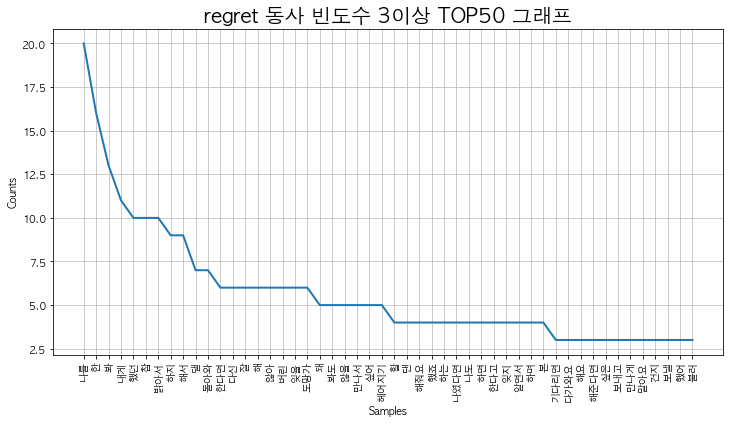

In [104]:
# regret 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("regret 동사 빈도수 3이상 TOP50 그래프", size =20)
ko_r.plot(50)
plt.show()

In [105]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko_r.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data3)

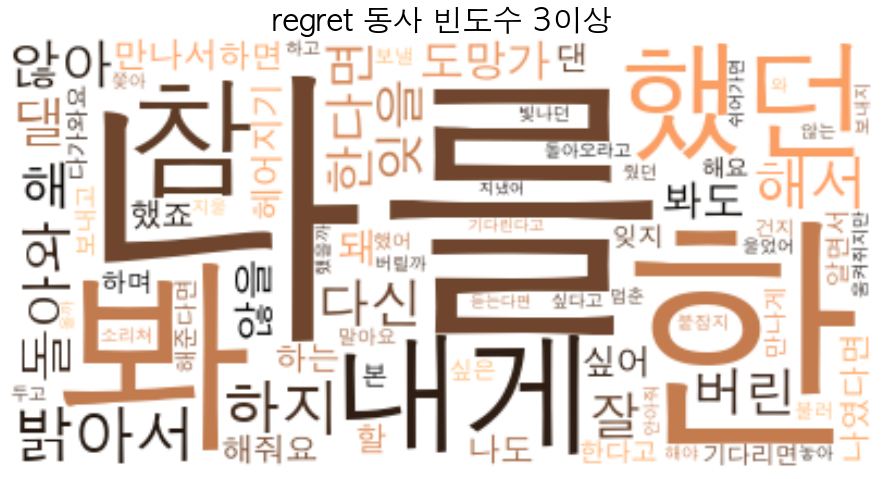

In [107]:
plt.figure(figsize=(16,8))
plt.title("regret 동사 빈도수 3이상", size =30, weight = 'bold')
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

### 추출한 regret 토큰 확인하기

In [108]:
# regret 동사 토큰
print("동사토큰 : \n",list(ko_r.vocab())," => 동사 토큰 갯수 : ",len(list(ko_r.vocab())))

동사토큰 : 
 ['나를', '한', '봐', '내게', '했던', '참', '밝아서', '하지', '해서', '댈', '돌아와', '한다면', '다신', '잘', '해', '않아', '버린', '잊을', '도망가', '돼', '봐도', '않을', '만나서', '싶어', '헤어지기', '할', '댄', '해줘요', '했죠', '하는', '나였다면', '나도', '하면', '한다고', '잊지', '알면서', '하며', '본', '기다리면', '다가와요', '해요', '해준다면', '싶은', '보내고', '만나게', '말아요', '건지', '보낼', '했어', '불러', '돌아오라고', '싶다고', '와', '두고', '보내지', '멈춘', '지울', '붙잡지', '않는', '하고', '소리쳐', '빛나던', '줬던', '놓아', '버릴까', '움켜쥐지만', '쫓아', '쉬어가면', '해야', '했을까', '울었어', '안아줘', '듣는다면', '기다린다고', '지냈어', '올까']  => 동사 토큰 갯수 :  76


In [109]:
token_regret = list(ko_r.vocab())

---
# indifference

In [110]:
# train.loc[79,:]

In [111]:
indifference_list = []
for i in range(60, 80):
    indifference_list.append(train['가사'][i])

In [112]:
len(indifference_list)

20

In [113]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results4 = []
lines = indifference_list
for line in lines:
    # 형태소 분석하기 단어의 기본형 사용 안하기
    train_malist = twitter.pos(line) # 단어의 기본형 사용,norm=True,stem=True
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            # 동사만 추출
            if word[1] in ["Verb"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl_i = (" ".join(r).strip())
    
    results4.append(rl_i)

In [114]:
token_i = str(results4).split(" ")

In [115]:
# 불용어 추가
stop_words_indifference = ["'나를","['된","쉬어요',","'하는","기댄',","채우네',","'잊는다는","잊는다는',","'비는","주고',","'걷는다","만나러',",\
    "'나면","견딜',","'잃어서","해줘',","'큰","오면은',","'내게","가',","'이었을거야","갔네',","'따라","그쳐가',","'해줬었던","내게',","'태어난다면",\
        "기를',","'물러나","기다리는',","'만나서","가봐',","'닿을","머문',","'했었지", "걷지',","'걸어가는","되돌릴',","할래']",]
token_indifference = [each_word for each_word in token_i if each_word not in stop_words_indifference]


In [116]:
# 상위 100개 단어 확인
ko_i = nltk.Text(token_indifference)
ko_i.vocab().most_common(500)

[('내게', 18),
 ('할', 16),
 ('하는', 13),
 ('되는', 11),
 ('한', 11),
 ('걷는다', 8),
 ('않을', 7),
 ('해', 7),
 ('남은', 6),
 ('봐', 6),
 ('댈', 5),
 ('참', 5),
 ('하게', 5),
 ('그리', 5),
 ('하지', 5),
 ('돌아와', 5),
 ('만나서', 4),
 ('잊는다는', 4),
 ('가', 4),
 ('될까', 4),
 ('나를', 4),
 ('했고', 4),
 ('만나게', 4),
 ('이뤄져', 4),
 ('했지', 4),
 ('끝난', 4),
 ('말아요', 3),
 ('해야', 3),
 ('하겠어', 3),
 ('돼', 3),
 ('해도', 3),
 ('멀어지는', 3),
 ('잡아도', 3),
 ('견딜', 3),
 ('들려오는', 3),
 ('느껴지는', 3),
 ('커져가던', 3),
 ('갇혀', 3),
 ('잃고', 3),
 ('울리던', 3),
 ('들리지', 3),
 ('작아져', 3),
 ('가는', 3),
 ('엇갈린', 3),
 ('지나쳐', 3),
 ('맞는', 3),
 ('알아요', 3),
 ('갈', 3),
 ('누르고', 3),
 ('채우다', 3),
 ('지우며', 3),
 ('덜어내', 3),
 ('몰랐을까', 3),
 ('이뤄질', 3),
 ('지킬', 3),
 ('머문', 3),
 ('감추려', 3),
 ('달래며', 3),
 ('돌아', 3),
 ('잖아', 3),
 ('해요', 2),
 ('지켜', 2),
 ('왔죠', 2),
 ('들어와', 2),
 ('미운', 2),
 ('쏟아내', 2),
 ('주긴', 2),
 ('서', 2),
 ('뜨지', 2),
 ('않는데', 2),
 ('않은', 2),
 ('숨어있든', 2),
 ('찾아줘', 2),
 ('껴', 2),
 ('나온', 2),
 ('비춰줘', 2),
 ('들', 2),
 ('해줬던', 2),
 ('했었던', 2),
 ('일까', 2),
 ('잊어

In [117]:
len(ko_i.vocab())

387

In [118]:
# 불용어 작업후 빈도수가 2이하인 경우 전부 삭제 
testing_i = []
for key, val in zip(list(ko_i.vocab().keys()),list(ko_i.vocab().values())):
    if val < 3:
        testing_i.append([key,val])
testing_i2 = []
for i in range(len(testing_i)):
    testing_i2.append(str(testing_i[i][0]))

In [120]:
# 2번이하 사용된 언어 지운후 다시 확인
token_del = set(ko_i.vocab()) - set(testing_i2)
token_ko4 = [each_word for each_word in token_i if each_word in token_del]
ko_i = nltk.Text(token_ko4)
ko_i.vocab().most_common(500)

[('내게', 18),
 ('할', 16),
 ('하는', 13),
 ('되는', 11),
 ('한', 11),
 ('걷는다', 8),
 ('않을', 7),
 ('해', 7),
 ('남은', 6),
 ('봐', 6),
 ('댈', 5),
 ('참', 5),
 ('하게', 5),
 ('그리', 5),
 ('하지', 5),
 ('돌아와', 5),
 ('만나서', 4),
 ('잊는다는', 4),
 ('가', 4),
 ('될까', 4),
 ('나를', 4),
 ('했고', 4),
 ('만나게', 4),
 ('이뤄져', 4),
 ('했지', 4),
 ('끝난', 4),
 ('말아요', 3),
 ('해야', 3),
 ('하겠어', 3),
 ('돼', 3),
 ('해도', 3),
 ('멀어지는', 3),
 ('잡아도', 3),
 ('견딜', 3),
 ('들려오는', 3),
 ('느껴지는', 3),
 ('커져가던', 3),
 ('갇혀', 3),
 ('잃고', 3),
 ('울리던', 3),
 ('들리지', 3),
 ('작아져', 3),
 ('가는', 3),
 ('엇갈린', 3),
 ('지나쳐', 3),
 ('맞는', 3),
 ('알아요', 3),
 ('갈', 3),
 ('누르고', 3),
 ('채우다', 3),
 ('지우며', 3),
 ('덜어내', 3),
 ('몰랐을까', 3),
 ('이뤄질', 3),
 ('지킬', 3),
 ('머문', 3),
 ('감추려', 3),
 ('달래며', 3),
 ('돌아', 3),
 ('잖아', 3)]

In [122]:
len(ko_i.vocab())

60

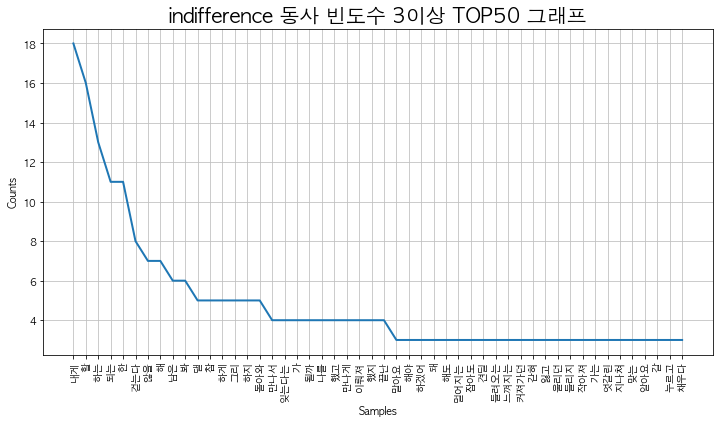

In [124]:
# indifference 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("indifference 동사 빈도수 3이상 TOP50 그래프", size =20)
ko_i.plot(50)
plt.show()

In [125]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data4 = ko_i.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data4 = dict(data3)

wordcloud4 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data4)

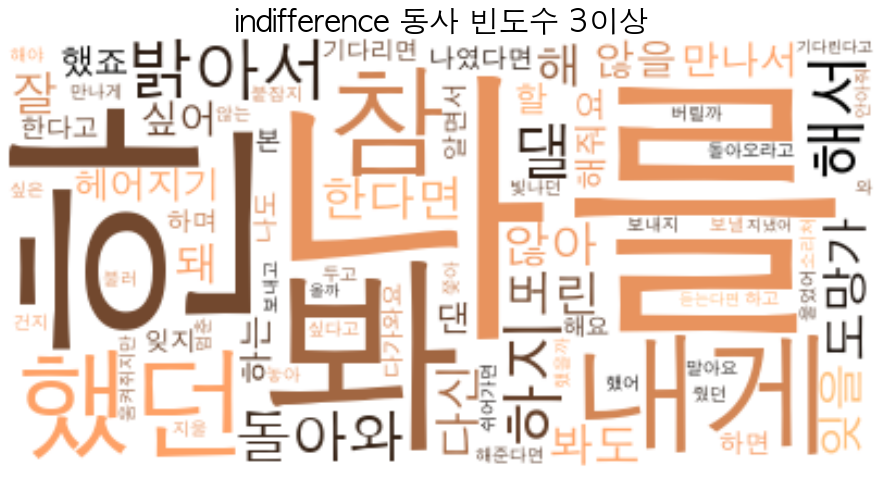

In [126]:
plt.figure(figsize=(16,8))
plt.title("indifference 동사 빈도수 3이상", size =30, weight = 'bold')
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

### 추출한 indifference 토큰 확인하기

In [127]:
# regret 동사 토큰
print("동사토큰 : \n",list(ko_i.vocab())," => 동사 토큰 갯수 : ",len(list(ko_i.vocab())))

동사토큰 : 
 ['내게', '할', '하는', '되는', '한', '걷는다', '않을', '해', '남은', '봐', '댈', '참', '하게', '그리', '하지', '돌아와', '만나서', '잊는다는', '가', '될까', '나를', '했고', '만나게', '이뤄져', '했지', '끝난', '말아요', '해야', '하겠어', '돼', '해도', '멀어지는', '잡아도', '견딜', '들려오는', '느껴지는', '커져가던', '갇혀', '잃고', '울리던', '들리지', '작아져', '가는', '엇갈린', '지나쳐', '맞는', '알아요', '갈', '누르고', '채우다', '지우며', '덜어내', '몰랐을까', '이뤄질', '지킬', '머문', '감추려', '달래며', '돌아', '잖아']  => 동사 토큰 갯수 :  60


In [128]:
token_indifference = list(ko_i.vocab())

---
# 벤다이어그램 시각화

In [129]:
# pip install venn

In [130]:
# 벤다이어 그램 설치 필요
%matplotlib inline

import venn

In [131]:
labels = venn.get_labels([
           set(token_happy), set(token_sad), set(token_regret), set(token_indifference)
        ])
print(labels)


{'0001': '38 ', '0010': '43 ', '0011': '6 ', '0100': '36 ', '0101': '2 ', '0110': '7 ', '0111': '2 ', '1000': '54 ', '1001': '2 ', '1010': '4 ', '1011': '0 ', '1100': '7 ', '1101': '1 ', '1110': '5 ', '1111': '9 '}


/Users/uyoung/miniforge3/envs/tensorflow/lib/python3.9/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((


In [132]:
import warnings
warnings.filterwarnings("ignore")

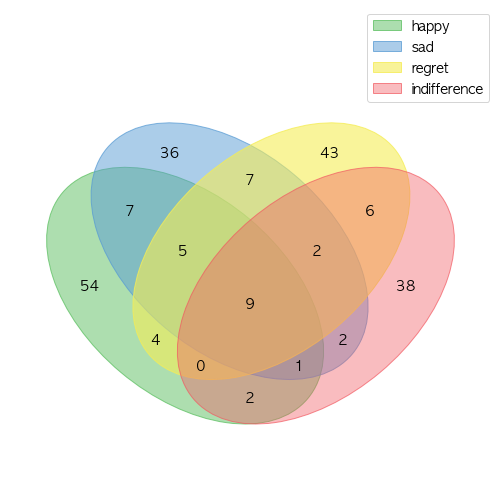

In [133]:
fig, ax = venn.venn4(labels, names=['happy', 'sad','regret','indifference'])
fig.show()

In [134]:
# 벤다이어 그램에서 제거한 결과단어 확인하기
set1 = set(token_happy) - set(token_sad) - set(token_regret) - set(token_indifference)
set2 = set(token_sad) - set(token_regret) - set(token_indifference)- set(token_happy)
set3 = set(token_regret) - set(token_indifference)- set(token_happy) - set(token_sad)
set4 = set(token_indifference)- set(token_happy) - set(token_sad) - set(token_regret)
print(len(set1),"\n",set(token_happy)-set1,"\n\n")
print(len(set2),"\n",set(token_sad)-set2,"\n\n")
print(len(set3),"\n",set(token_regret)-set3,"\n\n")
print(len(set4),"\n",set(token_indifference)-set4,"\n\n")

54 
 {'참', '내게', '잘', '나도', '본', '싶어', '가', '봐', '해줘', '해', '와', '한', '할게', '갈', '봐도', '잖아', '나를', '하면', '돼', '보면', '싶은', '웃는', '하는', '따라', '할', '애써', '하며', '모르는'} 


36 
 {'않아', '참', '내게', '잘', '나도', '보낼', '싶어', '봐', '줬던', '해줘', '잊을', '해', '한', '했어', '할게', '봐도', '잖아', '나를', '하면', '하지', '않을', '버린', '돼', '보면', '웃는', '하는', '했던', '따라', '할', '애써', '들려오는', '되는', '모르는'} 


43 
 {'않아', '참', '내게', '잘', '나도', '보낼', '본', '싶어', '댈', '봐', '만나게', '잊을', '해', '와', '돌아와', '한', '했어', '봐도', '나를', '하지', '하면', '않을', '말아요', '버린', '해야', '돼', '싶은', '하는', '했던', '할', '줬던', '만나서', '하며'} 


38 
 {'참', '내게', '가', '댈', '봐', '만나게', '해', '돌아와', '한', '갈', '잖아', '나를', '하지', '않을', '말아요', '해야', '돼', '하는', '할', '들려오는', '만나서', '되는'} 




### 중복 제거한 happy 1글자 이하 지우기

In [135]:
happy = list(set1)
print(happy)

['녹아내리면', '추면서', '이루는', '왔던', '해봐도', '믿어줘', '안아', '보이는', '말아줘', '떨리게', '느낄', '낡아진', '지펴', '부르며', '들리지만', '하면서', '가고', '뜨면', '된', '밤새워', '알까', '꿈꿔', '떠나지', '손잡아', '오질', '모르게', '만드는', '커져만', '느껴', '오면', '들으며', '질러', '잊으려고', '부는', '싶어요', '보며', '할래', '않네요', '해봐요', '머물러줘요', '아껴줄게', '멀어져', '주고', '믿지', '갈께', '하잖아', '하겠지만', '된다고', '떨리는', '던져', '잠잠', '져서', '기다리면서', '주세요']


In [136]:
# 한글자 0 값 넣기
for i in range(len(happy)):
    if len(happy[i]) <= 1:
        happy[i] = 0
    else:
        happy[i] = happy[i]

In [137]:
print(happy)

['녹아내리면', '추면서', '이루는', '왔던', '해봐도', '믿어줘', '안아', '보이는', '말아줘', '떨리게', '느낄', '낡아진', '지펴', '부르며', '들리지만', '하면서', '가고', '뜨면', 0, '밤새워', '알까', '꿈꿔', '떠나지', '손잡아', '오질', '모르게', '만드는', '커져만', '느껴', '오면', '들으며', '질러', '잊으려고', '부는', '싶어요', '보며', '할래', '않네요', '해봐요', '머물러줘요', '아껴줄게', '멀어져', '주고', '믿지', '갈께', '하잖아', '하겠지만', '된다고', '떨리는', '던져', '잠잠', '져서', '기다리면서', '주세요']


In [138]:
# 0 값 지우기
remove_set = {0}

happy = [i for i in happy if i not in remove_set]
print(happy, len(happy))

['녹아내리면', '추면서', '이루는', '왔던', '해봐도', '믿어줘', '안아', '보이는', '말아줘', '떨리게', '느낄', '낡아진', '지펴', '부르며', '들리지만', '하면서', '가고', '뜨면', '밤새워', '알까', '꿈꿔', '떠나지', '손잡아', '오질', '모르게', '만드는', '커져만', '느껴', '오면', '들으며', '질러', '잊으려고', '부는', '싶어요', '보며', '할래', '않네요', '해봐요', '머물러줘요', '아껴줄게', '멀어져', '주고', '믿지', '갈께', '하잖아', '하겠지만', '된다고', '떨리는', '던져', '잠잠', '져서', '기다리면서', '주세요'] 53


### 중복 제거한 sad 1글자 이하 지우기

In [139]:
sad = list(set2)
print(sad)

['듣던', '서', '하길', '잊고', '돌아보지', '싶죠', '잊어', '보낼게', '지워', '했단', '미운', '안기던', '나와', '마시고', '걸까', '가져가', '됐고', '본다', '나면', '되어', '걷던', '싶다', '하려해', '헤어져야', '가버리면', '맞추던', '다가갈', '만난다면', '줘', '바라만', '남겨', '들은', '지워줘', '바랄게', '견디기', '지나면']


In [140]:
# 한글자 0 값 넣기
for i in range(len(sad)):
    if len(sad[i]) <= 1:
        sad[i] = 0
    else:
        sad[i] = sad[i]
print(sad)

['듣던', 0, '하길', '잊고', '돌아보지', '싶죠', '잊어', '보낼게', '지워', '했단', '미운', '안기던', '나와', '마시고', '걸까', '가져가', '됐고', '본다', '나면', '되어', '걷던', '싶다', '하려해', '헤어져야', '가버리면', '맞추던', '다가갈', '만난다면', 0, '바라만', '남겨', '들은', '지워줘', '바랄게', '견디기', '지나면']


In [141]:
# 0 값 지우기
remove_set = {0}

sad = [i for i in sad if i not in remove_set]
print(sad, len(sad))

['듣던', '하길', '잊고', '돌아보지', '싶죠', '잊어', '보낼게', '지워', '했단', '미운', '안기던', '나와', '마시고', '걸까', '가져가', '됐고', '본다', '나면', '되어', '걷던', '싶다', '하려해', '헤어져야', '가버리면', '맞추던', '다가갈', '만난다면', '바라만', '남겨', '들은', '지워줘', '바랄게', '견디기', '지나면'] 34


### 중복 제거한 regret 1글자 이하 지우기

In [142]:
regret = list(set3)
print(regret)

['지울', '소리쳐', '지냈어', '하고', '멈춘', '불러', '해서', '돌아오라고', '쉬어가면', '붙잡지', '해준다면', '했을까', '밝아서', '안아줘', '한다고', '빛나던', '했죠', '건지', '다가와요', '보내지', '알면서', '두고', '버릴까', '않는', '나였다면', '헤어지기', '한다면', '다신', '놓아', '해줘요', '보내고', '기다린다고', '기다리면', '도망가', '잊지', '올까', '울었어', '댄', '싶다고', '듣는다면', '움켜쥐지만', '쫓아', '해요']


In [143]:
# 한글자 0 값 넣기
for i in range(len(regret)):
    if len(regret[i]) <= 1:
        regret[i] = 0
    else:
        regret[i] = regret[i]
print(regret)

['지울', '소리쳐', '지냈어', '하고', '멈춘', '불러', '해서', '돌아오라고', '쉬어가면', '붙잡지', '해준다면', '했을까', '밝아서', '안아줘', '한다고', '빛나던', '했죠', '건지', '다가와요', '보내지', '알면서', '두고', '버릴까', '않는', '나였다면', '헤어지기', '한다면', '다신', '놓아', '해줘요', '보내고', '기다린다고', '기다리면', '도망가', '잊지', '올까', '울었어', 0, '싶다고', '듣는다면', '움켜쥐지만', '쫓아', '해요']


In [144]:
# 0 값 지우기
remove_set = {0}

regret = [i for i in regret if i not in remove_set]
print(regret, len(regret))

['지울', '소리쳐', '지냈어', '하고', '멈춘', '불러', '해서', '돌아오라고', '쉬어가면', '붙잡지', '해준다면', '했을까', '밝아서', '안아줘', '한다고', '빛나던', '했죠', '건지', '다가와요', '보내지', '알면서', '두고', '버릴까', '않는', '나였다면', '헤어지기', '한다면', '다신', '놓아', '해줘요', '보내고', '기다린다고', '기다리면', '도망가', '잊지', '올까', '울었어', '싶다고', '듣는다면', '움켜쥐지만', '쫓아', '해요'] 42


### 중복 제거한 indifference 1글자이하 지우기

In [145]:
indifference = list(set4)
print(indifference)

['엇갈린', '작아져', '지나쳐', '지킬', '잃고', '누르고', '커져가던', '그리', '견딜', '이뤄질', '끝난', '몰랐을까', '달래며', '하겠어', '가는', '멀어지는', '걷는다', '지우며', '들리지', '했고', '맞는', '남은', '될까', '이뤄져', '감추려', '채우다', '잊는다는', '해도', '했지', '갇혀', '울리던', '하게', '느껴지는', '덜어내', '돌아', '머문', '잡아도', '알아요']


In [146]:
# 한글자 0 값 넣기
for i in range(len(indifference)):
    if len(indifference[i]) <= 1:
        indifference[i] = 0
    else:
        indifference[i] = indifference[i]
print(indifference)

['엇갈린', '작아져', '지나쳐', '지킬', '잃고', '누르고', '커져가던', '그리', '견딜', '이뤄질', '끝난', '몰랐을까', '달래며', '하겠어', '가는', '멀어지는', '걷는다', '지우며', '들리지', '했고', '맞는', '남은', '될까', '이뤄져', '감추려', '채우다', '잊는다는', '해도', '했지', '갇혀', '울리던', '하게', '느껴지는', '덜어내', '돌아', '머문', '잡아도', '알아요']


In [147]:
# 0 값 지우기
remove_set = {0}

indifference = [i for i in indifference if i not in remove_set]
print(indifference, len(indifference))

['엇갈린', '작아져', '지나쳐', '지킬', '잃고', '누르고', '커져가던', '그리', '견딜', '이뤄질', '끝난', '몰랐을까', '달래며', '하겠어', '가는', '멀어지는', '걷는다', '지우며', '들리지', '했고', '맞는', '남은', '될까', '이뤄져', '감추려', '채우다', '잊는다는', '해도', '했지', '갇혀', '울리던', '하게', '느껴지는', '덜어내', '돌아', '머문', '잡아도', '알아요'] 38


# 토큰 합치기

In [320]:
token_sum = happy + sad + regret + indifference
print(len(token_sum), token_sum)

167 ['녹아내리면', '추면서', '이루는', '왔던', '해봐도', '믿어줘', '안아', '보이는', '말아줘', '떨리게', '느낄', '낡아진', '지펴', '부르며', '들리지만', '하면서', '가고', '뜨면', '밤새워', '알까', '꿈꿔', '떠나지', '손잡아', '오질', '모르게', '만드는', '커져만', '느껴', '오면', '들으며', '질러', '잊으려고', '부는', '싶어요', '보며', '할래', '않네요', '해봐요', '머물러줘요', '아껴줄게', '멀어져', '주고', '믿지', '갈께', '하잖아', '하겠지만', '된다고', '떨리는', '던져', '잠잠', '져서', '기다리면서', '주세요', '듣던', '하길', '잊고', '돌아보지', '싶죠', '잊어', '보낼게', '지워', '했단', '미운', '안기던', '나와', '마시고', '걸까', '가져가', '됐고', '본다', '나면', '되어', '걷던', '싶다', '하려해', '헤어져야', '가버리면', '맞추던', '다가갈', '만난다면', '바라만', '남겨', '들은', '지워줘', '바랄게', '견디기', '지나면', '지울', '소리쳐', '지냈어', '하고', '멈춘', '불러', '해서', '돌아오라고', '쉬어가면', '붙잡지', '해준다면', '했을까', '밝아서', '안아줘', '한다고', '빛나던', '했죠', '건지', '다가와요', '보내지', '알면서', '두고', '버릴까', '않는', '나였다면', '헤어지기', '한다면', '다신', '놓아', '해줘요', '보내고', '기다린다고', '기다리면', '도망가', '잊지', '올까', '울었어', '싶다고', '듣는다면', '움켜쥐지만', '쫓아', '해요', '엇갈린', '작아져', '지나쳐', '지킬', '잃고', '누르고', '커져가던', '그리', '견딜', '이뤄질', '끝난', '몰랐을까', '달래며', '하겠어', '가는', '멀어지는', '걷는다', '지우

---
# 토큰 one hot
- 토큰을 동사와 명사의 현재형으로 저장했기 때문에 가사를 okt로 동사+명사로 전체 바꿔줘야함

In [149]:
from tensorflow import keras

In [150]:
# 가사 데이터 okt로 분류하기 
twitter = Okt() 
okt_result = []
lines = train['가사']
for line in lines:
    # 형태소 분석하기 단어의 기본형은 안씀
    train_malist = twitter.pos(line) # 단어의 기본형 사용 ,norm=True,stem=True
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            # 동사만 추출
            if word[1] in ["Verb"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl3 = (" ".join(r).strip())
    
    okt_result.append(rl3)
    # print(rl3)

In [151]:
# 동사로 분리가 잘 되었는지 확인하기
okt_result[0]

'만나면 빠질 거닐 오면 멈추고서 바라보다가 맞출지도 몰라 오면 밝게 빛나는 기대어 멈춰 버린 할 잊지 할 느끼던 들 비추는 멈추고 올 다투다 보면 아는 될 멈춰 버린 할 나를 보며 지었던 담아 할게 나를 안아줘'

In [152]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [153]:
print((encoded[0]))

[80, 112, 0, 0, 0, 31, 0, 0, 0, 0, 29, 0, 0, 92, 2, 0, 0, 0, 85, 0, 118, 115, 144, 0, 150, 0, 147, 121, 0, 141, 0, 0, 29, 0, 0, 100, 0, 0, 103, 112, 0, 0, 120, 0, 0, 0, 92, 0, 0, 110, 0, 0, 36, 0, 156, 147, 0, 36, 0, 162, 0, 49, 0, 148, 0, 0, 2, 0, 0, 92, 2, 0, 0, 123, 0, 115, 0, 115, 0, 118, 0, 0, 40, 0, 0, 152, 0, 92, 0, 0, 110, 0, 0, 36, 0, 112, 0, 0, 118, 0, 0, 147, 0, 49, 0, 0, 40, 0, 36, 0, 0, 112, 0, 0, 101, 40, 0]


---
# 전체 길이 padding작업

In [154]:
import matplotlib.pyplot as plt

가사의 최대 길이 : 218
가사의 최소 길이 : 56
가사의 평균 길이 : 133.850000


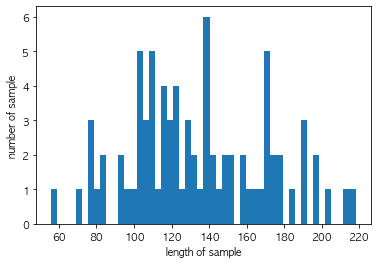

In [155]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [156]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=max_length, padding='post')
padding_paragraphs_encoding

array([[ 80, 112,   0, ...,   0,   0,   0],
       [ 80, 148,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [158,   0, 147, ...,   0,   0,   0],
       [ 67,   0, 144, ...,   0,   0,   0],
       [112,   0,   0, ...,   0,   0,   0]], dtype=int32)

In [157]:
print(len(list(padding_paragraphs_encoding)), len(list(padding_paragraphs_encoding)[1]))

80 218


In [158]:
# 분류항목['happy', 'sad', 'regret', 'indifference']를 수치로 변경하기
categories = train['감정'].to_list()

def category_encoding(category):
    if category == 'happy':
        return 0
    elif category == 'sad':
        return 1
    elif category == 'regret':
        return 2
    else:
        return 3

In [159]:
encoded_category = [category_encoding(category) for category in categories]
encoded_category[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [160]:
len(encoded_category)

80

---
# 가사 감정 RNN model

In [308]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding, encoded_category, test_size=0.2
)

In [309]:
# train val data 만들기
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2
)

In [310]:
import warnings
from tensorflow import keras 

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'

warnings.filterwarnings('ignore')

In [311]:
print(train_input.shape, val_input.shape)

(51, 218) (13, 218)


In [312]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.SimpleRNN(64, input_shape=(218, 168)))
model.add(keras.layers.Dense(4, activation='softmax')) # 문장은 확률값을 구해야하므로

In [313]:
train_oh = keras.utils.to_categorical(train_input)
train_oh.shape

(51, 218, 168)

In [314]:
print(np.sum(train_oh[0][0]))

1.0


In [315]:
val_oh = keras.utils.to_categorical(val_input)
val_oh.shape

(13, 218, 168)

In [316]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, 64)                14912     
                                                                 
 dense_18 (Dense)            (None, 4)                 260       
                                                                 
Total params: 15,172
Trainable params: 15,172
Non-trainable params: 0
_________________________________________________________________


In [317]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-3)
model.compile(
    optimizer=rmsprop,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("Data/best-train_rnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=100,
    restore_best_weights= True
)

history = model.fit(
    np.array(train_oh),
    np.array(train_target),
    epochs=1000,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (np.array(val_oh), np.array(val_target)),
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/1000
2/2 [==============================] - 1s 145ms/step - loss: 1.4214 - accuracy: 0.2353 - val_loss: 1.3514 - val_accuracy: 0.3846
Epoch 2/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.4324 - accuracy: 0.2549 - val_loss: 1.4069 - val_accuracy: 0.2308
Epoch 3/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.4040 - accuracy: 0.3137 - val_loss: 1.3891 - val_accuracy: 0.2308
Epoch 4/1000
2/2 [==============================] - 0s 56ms/step - loss: 1.3814 - accuracy: 0.2941 - val_loss: 1.4205 - val_accuracy: 0.2308
Epoch 5/1000
2/2 [==============================] - 0s 91ms/step - loss: 1.3617 - accuracy: 0.3529 - val_loss: 1.3898 - val_accuracy: 0.2308
Epoch 6/1000
2/2 [==============================] - 0s 36ms/step - loss: 1.3542 - accuracy: 0.3529 - val_loss: 1.4055 - val_accuracy: 0.1538
Epoch 7/1000
2/2 [==============================] - 0s 35ms/step - loss: 1.3557 - accuracy: 0.3725 - val_loss: 1.3814 - val_accuracy: 0.2308
Epoch 8/1000

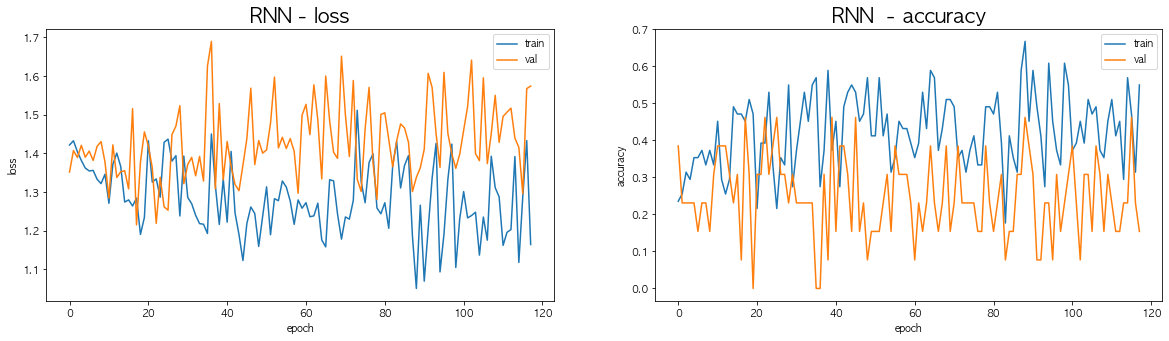

In [318]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("RNN - loss", size=20)
ax2.set_title("RNN  - accuracy", size=20)
plt.show()

In [319]:
print("accuracy :", np.mean(history.history['accuracy']))
print("val_accuracy :", np.mean(history.history['val_accuracy']))

accuracy : 0.42339648836750093
val_accuracy : 0.24837027900552344
